In [ ]:
#1

In [40]:
import numpy as np
import pandas as pd

In [45]:
np.random.seed(10)
temp_series_sample = np.random.choice(range(0, 10), 8)

In [46]:
temp_series_sample

array([9, 4, 0, 1, 9, 0, 1, 8])

In [47]:
temp_series = pd.Series(temp_series_sample)

In [48]:
temp_series

0    9
1    4
2    0
3    1
4    9
5    0
6    1
7    8
dtype: int32

In [ ]:
#2

In [49]:
from string import ascii_lowercase

alpha_list = list(ascii_lowercase)
alpha_list

['a',
 'b',
 'c',
 'd',
 'e',
 'f',
 'g',
 'h',
 'i',
 'j',
 'k',
 'l',
 'm',
 'n',
 'o',
 'p',
 'q',
 'r',
 's',
 't',
 'u',
 'v',
 'w',
 'x',
 'y',
 'z']

In [50]:
alpha_list[3:11]

['d', 'e', 'f', 'g', 'h', 'i', 'j', 'k']

In [51]:
temp_series.index = alpha_list[3:11]

In [52]:
temp_series

d    9
e    4
f    0
g    1
h    9
i    0
j    1
k    8
dtype: int32

In [54]:
temp_series.sort_index()

d    9
e    4
f    0
g    1
h    9
i    0
j    1
k    8
dtype: int32

In [55]:
#3 

In [ ]:
del temp_series['f']

In [59]:
del temp_series['i']

In [60]:
temp_series

d    9
e    4
g    1
h    9
j    1
k    8
dtype: int32

In [ ]:
#4

In [61]:
temp_series.sort_values(ascending=True)

g    1
j    1
e    4
k    8
d    9
h    9
dtype: int32

In [ ]:
#5

In [70]:
from konlpy.tag import Okt
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import re

In [67]:
data_sample = pd.read_csv('data/chunmoon_raw_final.csv')
data_sample

,review,id,date,score,like,dislike
0,한석규의 세종은 어떻게 해야 저런 연기가 가능한지 의문을 남긴다. 세종대왕 연기의 ...,Neuj(trym****),2019.12.26 09:19,9,3390,265
1,천문 천만될 가능성이 높습니다.다만 백두산에 상영관 밀리는 게 아쉽네요.정말 재미...,해바라기(assu****),2019.12.26 09:14,10,2714,400
2,최민식과 한석규라를 두 배우만으로도 볼 이유가 충분했던 영화지만 역사 책에서 볼 ...,goo1****,2019.12.26 10:37,10,2349,264
3,백두산에서 온 알바들아 평점테러 하지마라 백두산에 비하면 천문은 에레스트급이다,태태(atta****),2019.12.26 10:25,10,1889,340
4,간만에 본 대작입니다. 꼭보세요,쓰리디짱(ykjh****),2019.12.26 09:26,10,1450,166
...,...,...,...,...,...,...
12455,생각보다 좀 허술한 구성. 연기력은 출중,trus****,2020.03.05 16:23,6,13,57
12456,머그냥저냥볼만함그래도나쁘지않음,이정진(khmw****),2020.03.06 12:01,6,5,50
12457,약간 지루해서 내용이 기억이 잘 안나요.내용이 영화에서 본건지 꿈에서 본건지 애들 ...,Jess(giss****),2020.03.05 07:39,6,12,67
12458,세종대왕과 장영실이라는 훌륭한 소재로 이렇게 재미없게 영화를 만들 수 있다니 놀랍습...,maxkim(maxk****),2020.02.29 13:27,4,25,141


In [69]:
data = data_sample[data_sample['score'] <= 6]
data

,review,id,date,score,like,dislike
92,초반 1 20분은 배우들의 연기력에 놀라고 시작부터 강한 몰입감에 놀랐으나 뒤로 갈...,JEI(jmg_****),2019.12.27 01:13,2,197,144
98,담담한 서술이 밋밋하고 다소 지루하게 느겨지는 부분은 많이 아쉬운 부분이네요. 픽션...,anyt****,2019.12.27 16:43,6,123,72
116,진짜 너무 지루했음. 세종이랑 장영실 둘이서 누워서 별보는 장면이나 창호지 뚫어서...,별님(eun5****),2019.12.26 21:24,6,80,39
257,잔잔한거 싫어하시는분들에게는 비추드립니다저는 좀 졸렸네요,김지민(hern****),2019.12.27 22:49,6,23,6
258,관람평 찐입니까.. 영화 기획의 상상력이나 배우 한석규님의 연기력은 인정합니다만 ...,빵(bmmm****),2019.12.28 11:18,5,34,17
...,...,...,...,...,...,...
12455,생각보다 좀 허술한 구성. 연기력은 출중,trus****,2020.03.05 16:23,6,13,57
12456,머그냥저냥볼만함그래도나쁘지않음,이정진(khmw****),2020.03.06 12:01,6,5,50
12457,약간 지루해서 내용이 기억이 잘 안나요.내용이 영화에서 본건지 꿈에서 본건지 애들 ...,Jess(giss****),2020.03.05 07:39,6,12,67
12458,세종대왕과 장영실이라는 훌륭한 소재로 이렇게 재미없게 영화를 만들 수 있다니 놀랍습...,maxkim(maxk****),2020.02.29 13:27,4,25,141


In [75]:
raw_data = data['review']
raw_data

92       초반 1 20분은 배우들의 연기력에 놀라고 시작부터 강한 몰입감에 놀랐으나 뒤로 갈...
98       담담한 서술이 밋밋하고 다소 지루하게 느겨지는 부분은 많이 아쉬운 부분이네요. 픽션...
116      진짜 너무 지루했음. 세종이랑 장영실 둘이서 누워서 별보는 장면이나  창호지 뚫어서...
257                       잔잔한거 싫어하시는분들에게는 비추드립니다저는 좀 졸렸네요 
258      관람평 찐입니까..  영화 기획의 상상력이나 배우 한석규님의 연기력은 인정합니다만 ...
                               ...                        
12455                              생각보다 좀 허술한 구성. 연기력은 출중 
12456                                    머그냥저냥볼만함그래도나쁘지않음 
12457    약간 지루해서 내용이 기억이 잘 안나요.내용이 영화에서 본건지 꿈에서 본건지 애들 ...
12458    세종대왕과 장영실이라는 훌륭한 소재로 이렇게 재미없게 영화를 만들 수 있다니 놀랍습...
12459                                   어색한 브로맨스 질질끄는 지루함 
Name: review, Length: 1735, dtype: object

In [76]:
len(raw_data)

1735

In [117]:
raw = str(raw_data)

In [119]:
raw_data_fw = open('review.txt','w')
raw_data_fw.write(raw)
raw_data_fw.close()

In [120]:
raw_data_fw

<_io.TextIOWrapper name='review.txt' mode='w' encoding='cp949'>

In [122]:
with open('review.txt', 'r') as f:
    review = f.readlines()

In [123]:
review

['92       초반 1 20분은 배우들의 연기력에 놀라고 시작부터 강한 몰입감에 놀랐으나 뒤로 갈...\n',
 '98       담담한 서술이 밋밋하고 다소 지루하게 느겨지는 부분은 많이 아쉬운 부분이네요. 픽션...\n',
 '116      진짜 너무 지루했음. 세종이랑 장영실 둘이서 누워서 별보는 장면이나  창호지 뚫어서...\n',
 '257                       잔잔한거 싫어하시는분들에게는 비추드립니다저는 좀 졸렸네요 \n',
 '258      관람평 찐입니까..  영화 기획의 상상력이나 배우 한석규님의 연기력은 인정합니다만 ...\n',
 '                               ...                        \n',
 '12455                              생각보다 좀 허술한 구성. 연기력은 출중 \n',
 '12456                                    머그냥저냥볼만함그래도나쁘지않음 \n',
 '12457    약간 지루해서 내용이 기억이 잘 안나요.내용이 영화에서 본건지 꿈에서 본건지 애들 ...\n',
 '12458    세종대왕과 장영실이라는 훌륭한 소재로 이렇게 재미없게 영화를 만들 수 있다니 놀랍습...\n',
 '12459                                   어색한 브로맨스 질질끄는 지루함 \n',
 'Name: review, Length: 1735, dtype: object']

In [124]:
len(review)

12

In [125]:
raw1 = [string.split(" ") for string in review]
raw1

[['92',
  '',
  '',
  '',
  '',
  '',
  '',
  '초반',
  '1',
  '20분은',
  '배우들의',
  '연기력에',
  '놀라고',
  '시작부터',
  '강한',
  '몰입감에',
  '놀랐으나',
  '뒤로',
  '갈...\n'],
 ['98',
  '',
  '',
  '',
  '',
  '',
  '',
  '담담한',
  '서술이',
  '밋밋하고',
  '다소',
  '지루하게',
  '느겨지는',
  '부분은',
  '많이',
  '아쉬운',
  '부분이네요.',
  '픽션...\n'],
 ['116',
  '',
  '',
  '',
  '',
  '',
  '진짜',
  '너무',
  '지루했음.',
  '세종이랑',
  '장영실',
  '둘이서',
  '누워서',
  '별보는',
  '장면이나',
  '',
  '창호지',
  '뚫어서...\n'],
 ['257',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '잔잔한거',
  '싫어하시는분들에게는',
  '비추드립니다저는',
  '좀',
  '졸렸네요',
  '\n'],
 ['258',
  '',
  '',
  '',
  '',
  '',
  '관람평',
  '찐입니까..',
  '',
  '영화',
  '기획의',
  '상상력이나',
  '배우',
  '한석규님의',
  '연기력은',
  '인정합니다만',
  '...\n'],
 ['',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',

In [126]:
text = [string[1:len(string)-1] for string in raw1]

In [127]:
text_final = [" ".join(string) for string in text]

In [129]:
text_final

['      초반 1 20분은 배우들의 연기력에 놀라고 시작부터 강한 몰입감에 놀랐으나 뒤로',
 '      담담한 서술이 밋밋하고 다소 지루하게 느겨지는 부분은 많이 아쉬운 부분이네요.',
 '     진짜 너무 지루했음. 세종이랑 장영실 둘이서 누워서 별보는 장면이나  창호지',
 '                      잔잔한거 싫어하시는분들에게는 비추드립니다저는 좀 졸렸네요',
 '     관람평 찐입니까..  영화 기획의 상상력이나 배우 한석규님의 연기력은 인정합니다만',
 '                              ...                       ',
 '                             생각보다 좀 허술한 구성. 연기력은 출중',
 '                                   머그냥저냥볼만함그래도나쁘지않음',
 '   약간 지루해서 내용이 기억이 잘 안나요.내용이 영화에서 본건지 꿈에서 본건지 애들',
 '   세종대왕과 장영실이라는 훌륭한 소재로 이렇게 재미없게 영화를 만들 수 있다니',
 '                                  어색한 브로맨스 질질끄는 지루함',
 'review, Length: 1735, dtype:']

In [130]:
okt = Okt()

In [131]:
review_data = [okt.pos(word) for word in text_final]

In [132]:
review_data_temp = sum(review_data, [])

In [133]:
review_data_temp[:20]

[('초반', 'Noun'),
 ('1', 'Number'),
 ('20분', 'Number'),
 ('은', 'Foreign'),
 ('배우', 'Noun'),
 ('들', 'Suffix'),
 ('의', 'Josa'),
 ('연기력', 'Noun'),
 ('에', 'Josa'),
 ('놀라고', 'Verb'),
 ('시작', 'Noun'),
 ('부터', 'Josa'),
 ('강한', 'Adjective'),
 ('몰입', 'Noun'),
 ('감', 'Noun'),
 ('에', 'Josa'),
 ('놀랐으나', 'Verb'),
 ('뒤', 'Noun'),
 ('로', 'Josa'),
 ('담담한', 'Adjective')]

In [134]:
review_data_nouns = [word for word, _ in review_data_temp if _== 'Noun']

In [135]:
review_data_nouns

['초반',
 '배우',
 '연기력',
 '시작',
 '몰입',
 '감',
 '뒤',
 '서술',
 '다소',
 '느겨',
 '부분',
 '부분',
 '요',
 '진짜',
 '세종',
 '장영실',
 '둘이서',
 '별보',
 '장면',
 '창호지',
 '분',
 '저',
 '좀',
 '관람',
 '평',
 '입',
 '영화',
 '기획',
 '상상력',
 '배우',
 '한석규',
 '연기력',
 '인정',
 '생각',
 '좀',
 '술',
 '구성',
 '연기력',
 '출중',
 '머그',
 '냥볼',
 '함',
 '약간',
 '내용',
 '기억',
 '안나',
 '내용',
 '영화',
 '건',
 '꿈',
 '건',
 '애',
 '세종대왕',
 '장영실',
 '소재',
 '영화',
 '수',
 '브로맨스',
 '질질',
 '지루함']

In [137]:
review_data_nouns_2 = [word for word in review_data_nouns if len(word)>=2]

In [138]:
review_data_nouns_2

['초반',
 '배우',
 '연기력',
 '시작',
 '몰입',
 '서술',
 '다소',
 '느겨',
 '부분',
 '부분',
 '진짜',
 '세종',
 '장영실',
 '둘이서',
 '별보',
 '장면',
 '창호지',
 '관람',
 '영화',
 '기획',
 '상상력',
 '배우',
 '한석규',
 '연기력',
 '인정',
 '생각',
 '구성',
 '연기력',
 '출중',
 '머그',
 '냥볼',
 '약간',
 '내용',
 '기억',
 '안나',
 '내용',
 '영화',
 '세종대왕',
 '장영실',
 '소재',
 '영화',
 '브로맨스',
 '질질',
 '지루함']

In [143]:
wordcloud = WordCloud(font_path = 'c:/windows/fonts/malgun.ttf', width=800, height=600, max_words=100, collocations=False).generate(' '.join(review_data_nouns_2))

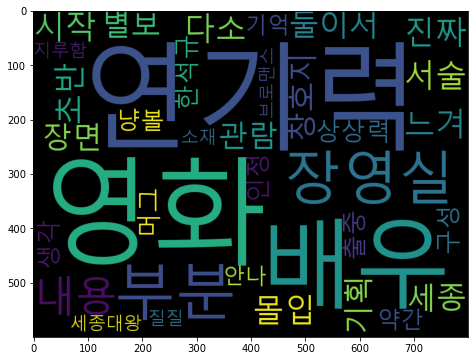

In [145]:
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud)
plt.show()

In [146]:
outwords = ['영화', '최민식', '한석규', '배우', '세종', '세종대왕', '장영실']

In [147]:
review_data_nouns_2_outwords = [word for word in review_data_nouns_2 if word not in outwords]

In [153]:
review_data_nouns_2_outwords

['초반',
 '연기력',
 '시작',
 '몰입',
 '서술',
 '다소',
 '느겨',
 '부분',
 '부분',
 '진짜',
 '둘이서',
 '별보',
 '장면',
 '창호지',
 '관람',
 '기획',
 '상상력',
 '연기력',
 '인정',
 '생각',
 '구성',
 '연기력',
 '출중',
 '머그',
 '냥볼',
 '약간',
 '내용',
 '기억',
 '안나',
 '내용',
 '소재',
 '브로맨스',
 '질질',
 '지루함']

In [150]:
wordcloud_final = WordCloud(font_path = 'c:/windows/fonts/malgun.ttf', width=800, height=600, max_words=100, collocations=False).generate(' '.join(review_data_nouns_2_outwords))

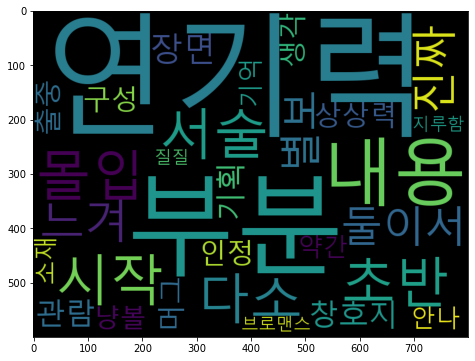

In [154]:
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud_final)
plt.show()

In [155]:
wordcloud_final_add = WordCloud(font_path = 'c:/windows/fonts/malgun.ttf', width=800, height=600, max_words=100, collocations=False, colormap='viridis', background_color='white').generate(' '.join(review_data_nouns_2_outwords))

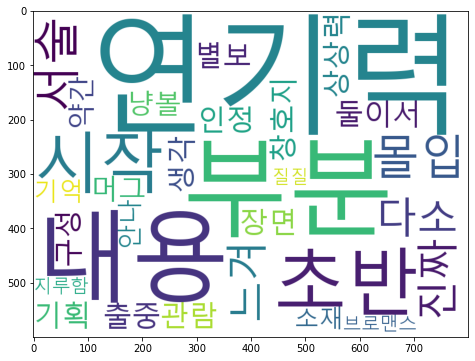

In [158]:
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud_final_add)
plt.show()